In [1]:
from sklearn.datasets import load_digits
from sklearn import utils
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import cosine
from sklearn.metrics import confusion_matrix, classification_report

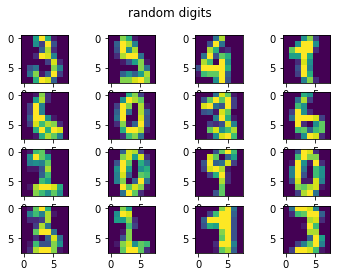

In [2]:
sample_count = 16
digits = load_digits()
digits.data.shape
data = digits.data
shuffled_data = utils.shuffle(data, random_state=42)
random_data = random.sample(list(shuffled_data), sample_count)
# random_data[1]
new_matrices = []
for i in range(0, 16):
    new_matrices.append(random_data[i].reshape((8,8)))
    
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4)
fig.suptitle('random digits')
ax1.imshow(new_matrices[0])
ax2.imshow(new_matrices[1])
ax3.imshow(new_matrices[2])
ax4.imshow(new_matrices[3])
ax5.imshow(new_matrices[4])
ax6.imshow(new_matrices[5])
ax7.imshow(new_matrices[6])
ax8.imshow(new_matrices[7])
ax9.imshow(new_matrices[8])
ax10.imshow(new_matrices[9])
ax11.imshow(new_matrices[10])
ax12.imshow(new_matrices[11])
ax13.imshow(new_matrices[12])
ax14.imshow(new_matrices[13])
ax15.imshow(new_matrices[14])
ax16.imshow(new_matrices[15])

plt.show()

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def cosine_distance(x1, x2):
    return (1-((np.dot(x1,x2))/(np.linalg.norm(x1)*np.linalg.norm(x2))))
#     return cosine(x1, x2)



class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_by_euclidean(self, X):
        y_pred = [self._predict_by_euclidean(x) for x in X]
        return np.array(y_pred)
    
    def predict_by_cosine(self, X):
        y_pred = [self._predict_by_cosine(x) for x in X]
        return np.array(y_pred)

    def _predict_by_euclidean(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(6)
        return most_common[0]
    def _predict_by_cosine(self, x):
        distances = [cosine_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(6)
        return most_common[0]
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [4]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
clf = KNN(k=4)
clf.fit(X_train, y_train)
perdictions = clf.predict_by_euclidean(X_test)
accuracy = accuracy(y_test, perdictions)
print(accuracy)


# cmap = ListedColormap(['#FF0000', '#00ff00', '#0000ff'])
# plt.figure()
# plt.scatter(X[:, 4], X[:, 3],cmap=cmap, c=y, edgecolor='k', s=20)
# plt.show()
# print(y_train)

0.9861111111111112


In [5]:
import pandas as pd
perdictions = clf.predict_by_euclidean(X_test)
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(perdictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,28,0,0,0,0,0,0,0,0,0
1,0,40,0,0,0,0,0,0,0,0
2,0,0,37,1,0,0,0,0,0,0
3,0,0,0,36,0,0,0,0,0,0
4,0,0,0,0,43,0,0,1,0,0
5,0,0,0,0,0,41,0,0,0,0
6,0,0,0,0,0,0,33,0,0,0
7,0,0,0,0,0,0,0,34,0,0
8,0,2,0,0,0,0,0,0,30,0


In [5]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = KNN(k=1)
clf.fit(X_train, y_train)
perdictions = clf.predict_by_cosine(X_test)
accuracy = accuracy(y_test, perdictions)
print(accuracy)

0.9722222222222222


In [8]:
import pandas as pd
perdictions = clf.predict_by_cosine(X_test)
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(perdictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,37,0,0,0,0,0,0,0,0,0
1,0,37,0,0,0,0,0,0,0,0
2,0,0,39,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,31,0,0,0,1
6,0,0,0,0,0,0,39,0,0,0
7,0,0,0,0,0,0,0,38,0,0
8,0,2,0,0,0,0,0,0,32,0


Text(0, 0.5, 'Error Rate')

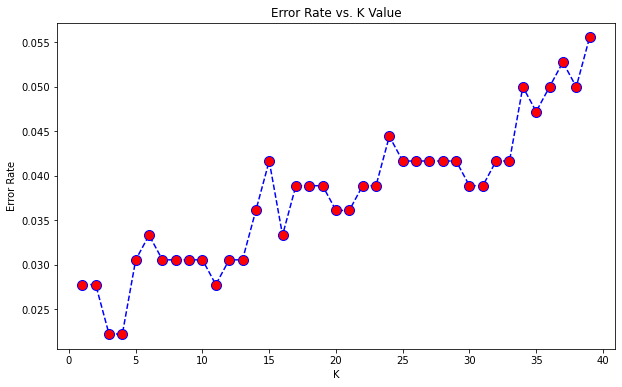

In [6]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNN(k=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict_by_euclidean(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

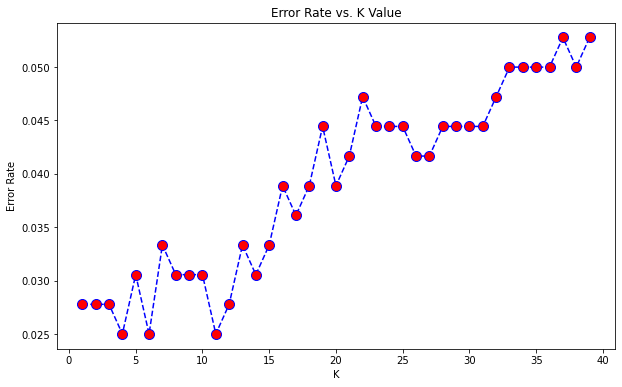

In [7]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNN(k=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict_by_cosine(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

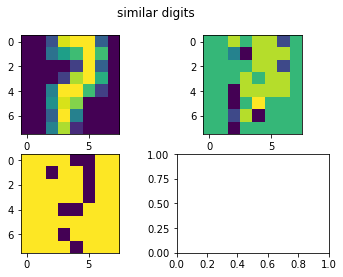

In [14]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
randomRow = np.random.randint(3, size=1)
ranom_value = X_test[randomRow[0], :]
clf = KNN(k=4)
clf.fit(ranom_value, y_train)
a = clf.predict_by_euclidean(ranom_value)

best1 = []
best2 = []
for i in range(64) :
    best1.append(a[i][0])
    best2.append(a[i][1])
best1np = np.array(best1)
best2np = np.array(best2)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('similar digits')
ax1.imshow(ranom_value.reshape(8,8))
ax2.imshow(best1np.reshape(8,8))
ax3.imshow(best2np.reshape(8,8))
plt.show()

C:\Users\hamid\AppData\Local\Temp/ipykernel_1916/104717127.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return (1-((np.dot(x1,x2))/(np.linalg.norm(x1)*np.linalg.norm(x2))))


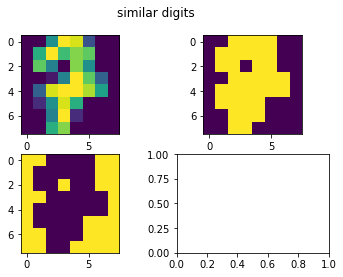

In [18]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
randomRow = np.random.randint(3, size=1)
ranom_value = X_test[randomRow[0], :]
clf = KNN(k=4)
clf.fit(ranom_value, y_train)
a = clf.predict_by_cosine(ranom_value)
best1 = []
best2 = []
for i in range(64) :
    best1.append(a[i][0])
    best2.append(a[i][1])
best1np = np.array(best1)
best2np = np.array(best2)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('similar digits')
ax1.imshow(ranom_value.reshape(8,8))
ax2.imshow(best1np.reshape(8,8))
ax3.imshow(best2np.reshape(8,8))
plt.show()